
# Project: Investigate FBI Gun Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, we'll be exploring FBI Gun Data as well as US Census data and looking to see if there may be any correlations between the two datasets.

#### Questions to Investigate
- What census data is most associated with high gun permits per capita?
- Which states have had the highest growth in gun registrations?
- What is the overall trend of gun purchases?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### FBI Gun Data Notes
- I will likely want to split the month column into year and month columns to group the data more usefully
- drop all but year, month, state, & totals (other data is largely incomplete)

#### Cleaned FBI Gun Data Notes
- Columns
    - Year
    - Month
    - State: 50 states only (dropped territories and DC)
    - Total Permits Issued: only kept the total column as it was the only column (other than month and state) with complete data

### Inspection

In [2]:
# Inspect FBI Gun Data
fbi_df = pd.read_csv('gun_data.csv')
fbi_df.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [3]:
fbi_df.shape

(12485, 27)

In [4]:
fbi_df.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


In [5]:
fbi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

## Cleaning FBI Data

In [6]:
# Drop unneeded columns
fbi_df.drop(['permit','permit_recheck','handgun','long_gun','other','multiple','admin','prepawn_handgun','prepawn_long_gun','prepawn_other','redemption_handgun','redemption_long_gun','redemption_other','returned_handgun','returned_long_gun','returned_other','rentals_handgun','rentals_long_gun','private_sale_handgun','private_sale_long_gun','private_sale_other','return_to_seller_handgun','return_to_seller_long_gun','return_to_seller_other'], axis=1, inplace=True)

In [7]:
# Confirm changes
fbi_df

,month,state,totals
0,2017-09,Alabama,32019
1,2017-09,Alaska,6303
2,2017-09,Arizona,28394
3,2017-09,Arkansas,17747
4,2017-09,California,123506
5,2017-09,Colorado,35873
6,2017-09,Connecticut,12117
7,2017-09,Delaware,3502
8,2017-09,District of Columbia,61
9,2017-09,Florida,77390


In [8]:
# States to drop
row_drop = ['District of Columbia','Guam','Mariana Islands','Puerto Rico','Virgin Islands']

In [9]:
# Query desired rows, filter out unneeded rows
fbi_df = fbi_df.query('state not in @row_drop')

In [10]:
# Confirm changes
fbi_df

,month,state,totals
0,2017-09,Alabama,32019
1,2017-09,Alaska,6303
2,2017-09,Arizona,28394
3,2017-09,Arkansas,17747
4,2017-09,California,123506
5,2017-09,Colorado,35873
6,2017-09,Connecticut,12117
7,2017-09,Delaware,3502
9,2017-09,Florida,77390
10,2017-09,Georgia,35371


In [11]:
# Convert month to datetime
fbi_df['date'] = pd.to_datetime(fbi_df['month'], format="%Y %m %d")

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [12]:
# Check data types; confirm datetime data type
fbi_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11350 entries, 0 to 12484
Data columns (total 4 columns):
month     11350 non-null object
state     11350 non-null object
totals    11350 non-null int64
date      11350 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 443.4+ KB


In [13]:
# Drop month column
fbi_df.drop(['month'], axis=1, inplace=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [14]:
# Split date into year and month
fbi_df['year'], fbi_df['month'] = fbi_df['date'].dt.year, fbi_df['date'].dt.month

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [15]:
# Confirm changes
fbi_df.head()

,state,totals,date,year,month
0,Alabama,32019,2017-09-01,2017,9
1,Alaska,6303,2017-09-01,2017,9
2,Arizona,28394,2017-09-01,2017,9
3,Arkansas,17747,2017-09-01,2017,9
4,California,123506,2017-09-01,2017,9


In [16]:
# Drop date column
fbi_df.drop(['date'], axis=1, inplace=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [17]:
# List column names
cols = fbi_df.columns.tolist()
cols

['state', 'totals', 'year', 'month']

In [18]:
# Rearrange columns
cols = cols[-2:] + cols[:2]
cols

['year', 'month', 'state', 'totals']

In [19]:
# Reorder columns in dataframe
fbi_df = fbi_df[cols]
fbi_df.head()

,year,month,state,totals
0,2017,9,Alabama,32019
1,2017,9,Alaska,6303
2,2017,9,Arizona,28394
3,2017,9,Arkansas,17747
4,2017,9,California,123506


In [20]:
# Confirm creation of new frame
fbi_df

,year,month,state,totals
0,2017,9,Alabama,32019
1,2017,9,Alaska,6303
2,2017,9,Arizona,28394
3,2017,9,Arkansas,17747
4,2017,9,California,123506
5,2017,9,Colorado,35873
6,2017,9,Connecticut,12117
7,2017,9,Delaware,3502
9,2017,9,Florida,77390
10,2017,9,Georgia,35371


In [21]:
# Check data types
fbi_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11350 entries, 0 to 12484
Data columns (total 4 columns):
year      11350 non-null int64
month     11350 non-null int64
state     11350 non-null object
totals    11350 non-null int64
dtypes: int64(3), object(1)
memory usage: 443.4+ KB


In [22]:
# Save cleaned data to new file
fbi_df.to_csv('gun_data_cleaned.csv', index=False)

#### Summary: Cleaned FBI Gun Data Notes
- Columns
    - Year, int
    - Month, int
    - State, string: 50 states only (dropped territories and DC)
    - Total Permits Issued, int: only kept the total column as it was the only column (other than month and state) with complete data

## Cleaning Census Data

In [23]:
# Read in Census data
census_df = pd.read_csv('U.S. Census Data.csv', thousands=',')
census_df.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [24]:
# Inspect Census shape
census_df.shape

(85, 52)

In [25]:
# Inspect Census info
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
Fact              80 non-null object
Fact Note         28 non-null object
Alabama           65 non-null object
Alaska            65 non-null object
Arizona           65 non-null object
Arkansas          65 non-null object
California        65 non-null object
Colorado          65 non-null object
Connecticut       65 non-null object
Delaware          65 non-null object
Florida           65 non-null object
Georgia           65 non-null object
Hawaii            65 non-null object
Idaho             65 non-null object
Illinois          65 non-null object
Indiana           65 non-null object
Iowa              65 non-null object
Kansas            65 non-null object
Kentucky          65 non-null object
Louisiana         65 non-null object
Maine             65 non-null object
Maryland          65 non-null object
Massachusetts     65 non-null object
Michigan          65 non-null object
Minnesota

In [26]:
# Transpose Index and Columns
census_df = census_df.T

In [27]:
# Confirm transpose
census_df.head()

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, ...","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016,...","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2...","Persons 65 years and over, percent, April 1, 2010",...,NaN,Value Flags,-,D,F,FN,NaN,S,X,Z
Fact Note,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Either no or too few sample observations were ...,Suppressed to avoid disclosure of confidential...,Fewer than 25 firms,Footnote on this item in place of data,Not available,Suppressed; does not meet publication standards,Not applicable,Value greater than zero but less than half uni...
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# Assign Fact row as column header
census_df.columns = census_df.iloc[0]

In [29]:
# check column labels
census_df.columns

Index([                                          'Population estimates, July 1, 2016,  (V2016)',
                                           'Population estimates base, April 1, 2010,  (V2016)',
        'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
                                                            'Population, Census, April 1, 2010',
                                       'Persons under 5 years, percent, July 1, 2016,  (V2016)',
                                                'Persons under 5 years, percent, April 1, 2010',
                                      'Persons under 18 years, percent, July 1, 2016,  (V2016)',
                                               'Persons under 18 years, percent, April 1, 2010',
                                  'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
                                            'Persons 65 years and over, percent, April 1, 2010',
                              

In [30]:
# check index labels
census_df.index

Index(['Fact', 'Fact Note', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida',
       'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

In [31]:
# Drop original Fact and Fact Note rows
census_df.drop(['Fact','Fact Note'], axis=0, inplace=True)

In [32]:
# check index labels
census_df.index

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

In [33]:
# Rename index
census_df.index.names = ['state']

In [34]:
# check rename
census_df.index

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object', name='state')

In [35]:
# check column labels
census_df.columns

Index([                                          'Population estimates, July 1, 2016,  (V2016)',
                                           'Population estimates base, April 1, 2010,  (V2016)',
        'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
                                                            'Population, Census, April 1, 2010',
                                       'Persons under 5 years, percent, July 1, 2016,  (V2016)',
                                                'Persons under 5 years, percent, April 1, 2010',
                                      'Persons under 18 years, percent, July 1, 2016,  (V2016)',
                                               'Persons under 18 years, percent, April 1, 2010',
                                  'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
                                            'Persons 65 years and over, percent, April 1, 2010',
                              

In [36]:
# Drop columns
census_df.drop(census_df.loc[:,'FIPS Code':'Z'], inplace=True, axis=1)

In [37]:
# Confirm drops
census_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 64 columns):
Population estimates, July 1, 2016,  (V2016)                                              50 non-null object
Population estimates base, April 1, 2010,  (V2016)                                        50 non-null object
Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)     50 non-null object
Population, Census, April 1, 2010                                                         50 non-null object
Persons under 5 years, percent, July 1, 2016,  (V2016)                                    50 non-null object
Persons under 5 years, percent, April 1, 2010                                             50 non-null object
Persons under 18 years, percent, July 1, 2016,  (V2016)                                   50 non-null object
Persons under 18 years, percent, April 1, 2010                                            50 non-null object
Persons 65 years an

In [38]:
# remove non-numeric characters from data, convert to float, coerce other to NaN
all_columns = census_df.columns
for column in all_columns:
    census_df[column].replace(regex=True,inplace=True,to_replace=r'\D+',value=r'')
    census_df[column]=pd.to_numeric(census_df[column], downcast='float', errors='coerce')

In [39]:
# confirm conversion
census_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 64 columns):
Population estimates, July 1, 2016,  (V2016)                                              50 non-null float32
Population estimates base, April 1, 2010,  (V2016)                                        50 non-null float32
Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)     50 non-null float32
Population, Census, April 1, 2010                                                         50 non-null float32
Persons under 5 years, percent, July 1, 2016,  (V2016)                                    50 non-null float32
Persons under 5 years, percent, April 1, 2010                                             50 non-null float32
Persons under 18 years, percent, July 1, 2016,  (V2016)                                   50 non-null float32
Persons under 18 years, percent, April 1, 2010                                            50 non-null float32
Persons 65 

In [40]:
# check for NaNs
census_df.isnull().sum().sum()

7

In [41]:
# fill NaNs with mean
census_df.fillna(census_df.mean,axis=1,inplace=True)

In [42]:
# check NaNs again
census_df.isnull().sum().sum()

0

In [43]:
# Save cleaned data to file
census_df.to_csv('census_cleaned.csv')

#### Summary: Cleaned Census Data
- transformed rows to columns
- dropped Fact and Fact Note rows
- converted objects/strings to floats
- removed non-numeric characters from all data
- replaced NaNs with mean

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1: Which states have had the highest growth in gun registrations?

In [44]:
# Pull data header
fbi_df.head()

,year,month,state,totals
0,2017,9,Alabama,32019
1,2017,9,Alaska,6303
2,2017,9,Arizona,28394
3,2017,9,Arkansas,17747
4,2017,9,California,123506


In [45]:
# Sort ascending by state, year, and month
fbi_df = fbi_df.sort_values(['state','year','month'], ascending=True)

In [46]:
# create column showing difference between totals between years, by state
fbi_df['diff'] = fbi_df['totals'].diff(1)
fbi_df

,year,month,state,totals,diff
12430,1998,11,Alabama,1062,NaN
12375,1998,12,Alabama,35506,34444.0
12320,1999,1,Alabama,18049,-17457.0
12265,1999,2,Alabama,20583,2534.0
12210,1999,3,Alabama,19424,-1159.0
12155,1999,4,Alabama,14823,-4601.0
12100,1999,5,Alabama,14043,-780.0
12045,1999,6,Alabama,14651,608.0
11990,1999,7,Alabama,14795,144.0
11935,1999,8,Alabama,17095,2300.0


In [47]:
# new frame for years 2000 through 2016
growth_10_16 = fbi_df.query('year >= 2000 and year <=2016')

In [48]:
# list top 5 states with largest difference in gun permits between 1998 and 2016
top5 = growth_10_16.groupby('state')['diff'].sum().nlargest(5)
top5

state
Kentucky      361651.0
California    161883.0
Florida       102172.0
Illinois       86198.0
Texas          79557.0
Name: diff, dtype: float64

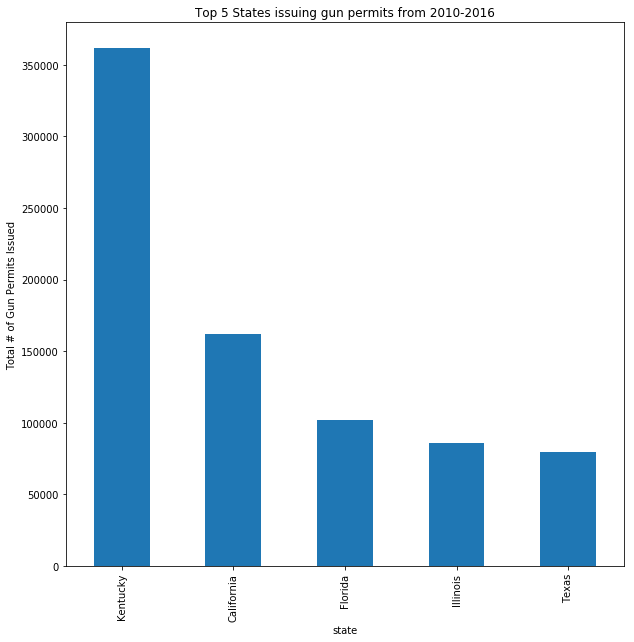

In [49]:
# plot of top 5 states by number of gun permits issued across all 50 states between 2000 and 2016
plt.figure(figsize=[10,10])
plt.xlabel('State')
plt.ylabel('Total # of Gun Permits Issued')
plt.title('Top 5 States issuing gun permits from 2010-2016')
top5.plot(kind='bar');

Kentucky had the largest increase (and more than twice as many as the second largest increase) in background checks with a change from 2010 to 2016 of 361,651. California, Florida, Illinois, and Texas, round out the top 5.

### Research Question 2: What is the overall trend of gun purchases?

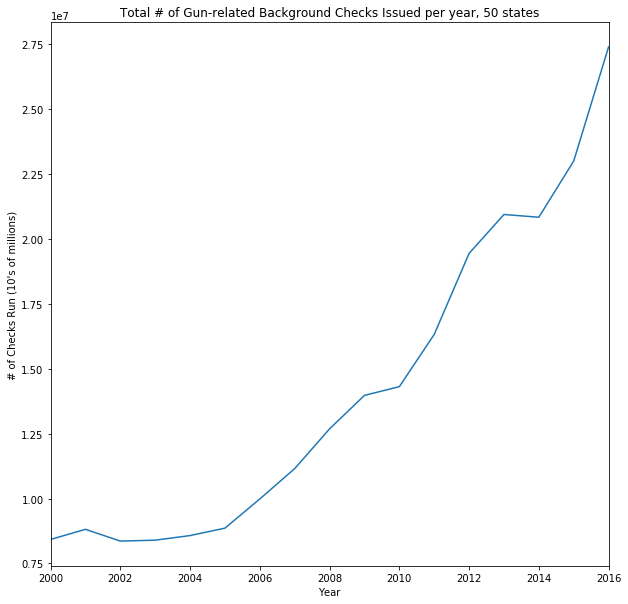

In [50]:
g = growth_10_16.groupby(['year'])['totals'].sum().plot(x='year', y='totals', figsize=[10,10])
plt.xlabel('Year')
plt.ylabel('# of Checks Run (10\'s of millions)')
plt.title('Total # of Gun-related Background Checks Issued per year, 50 states')
plt.show();

In [51]:
# overall growth in gun permits
change_2016 = growth_10_16.query('year == 2016')['totals'].sum()
change_2010 = growth_10_16.query('year == 2010')['totals'].sum()
o_growth = (change_2016 - change_2010) / change_2010
change_2016, change_2010, o_growth

(27405549, 14309926, 0.91514260800510083)

The overall trend for gun purchases, based on the FBI gun permit data, is positive - a change of 92.51% from 2010 to 2016.

### Research Questions 3: What census data is most associated with high gun permits per capita?

In [52]:
# show census data
census_df.head()

Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,"Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010"
state,,,,,,,,,,,,,,,,,,,,,
Alabama,4863300.0,4780131.0,170.0,4779736.0,600.0,640.0,2260.0,2370.0,1610.0,1380.0,...,322025.0,374153.0,203604.0,137630.0,92219.0,272651.0,41943.0,316984.0,944.0,5064533.0
Alaska,741894.0,710249.0,450.0,710231.0,730.0,760.0,2520.0,2640.0,1040.0,770.0,...,55521.0,68032.0,35402.0,22141.0,13688.0,51147.0,7953.0,56091.0,12.0,57064096.0
Arizona,6931071.0,6392301.0,840.0,6392017.0,630.0,710.0,2350.0,2550.0,1690.0,1380.0,...,451951.0,499926.0,245243.0,182425.0,135313.0,344981.0,46780.0,427582.0,563.0,11359408.0
Arkansas,2988248.0,2916025.0,250.0,2915918.0,640.0,680.0,2360.0,2440.0,1630.0,1440.0,...,198380.0,231959.0,123158.0,75962.0,35982.0,189029.0,25915.0,192988.0,56.0,5203548.0
California,39250016.0,37254520.0,540.0,37253956.0,630.0,680.0,2320.0,2500.0,1360.0,1140.0,...,3206958.0,3548449.0,1852580.0,1320085.0,1619857.0,1819107.0,252377.0,3176341.0,2391.0,15577922.0


In [53]:
# percent population change in Kentucky between 2010 and 2016
census_df.loc['Kentucky','Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)']

220.0

In [54]:
# percent change in gun permits in Kentucky between 2010 and 2016
ky_2010 = fbi_df.query('year == 2010 and state == "Kentucky"')['totals'].sum()
ky_2016 = fbi_df.query('year == 2016 and state == "Kentucky"')['totals'].sum()
ky_pct_change = (ky_2016 - ky_2010) / ky_2010
(ky_pct_change*100)

54.128075406431734

Between 2016 and 2010, Kentucky had a 54% increase in background checks for guns. As previously mentioned, this is due to their policy of running monthly checks for those with concealed carry permits.

In [55]:
# 2010 totals by state
g10 = growth_10_16[growth_10_16['year'] == 2010].groupby('state')['totals'].sum().reset_index()
g10.rename(columns={'totals':'2010_guns'}, inplace=True)
g10.set_index('state', inplace=True)

In [56]:
# 2016 totals by state
g16 = growth_10_16[growth_10_16['year'] == 2016].groupby('state')['totals'].sum().reset_index()
g16.rename(columns={'totals':'2016_guns'}, inplace=True)
g16.set_index('state', inplace=True)

In [57]:
# add gun checks totals columns to census_df
census_df['2016_guns'] = g16['2016_guns']
census_df['2010_guns'] = g10['2010_guns']

In [58]:
# add gun checks per capita columns to census_df
census_df['2016_guns_per_cap'] = census_df['2016_guns']/census_df['Population estimates, July 1, 2016,  (V2016)']
census_df['2010_guns_per_cap'] = census_df['2010_guns']/census_df['Population estimates base, April 1, 2010,  (V2016)']

In [59]:
# confirm new columns
census_df.head()

Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,"Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",2016_guns,2010_guns,2016_guns_per_cap,2010_guns_per_cap
state,,,,,,,,,,,,,,,,,,,,,
Alabama,4863300.0,4780131.0,170.0,4779736.0,600.0,640.0,2260.0,2370.0,1610.0,1380.0,...,92219.0,272651.0,41943.0,316984.0,944.0,5064533.0,616947,308607,0.126858,0.064560
Alaska,741894.0,710249.0,450.0,710231.0,730.0,760.0,2520.0,2640.0,1040.0,770.0,...,13688.0,51147.0,7953.0,56091.0,12.0,57064096.0,87647,65909,0.118140,0.092797
Arizona,6931071.0,6392301.0,840.0,6392017.0,630.0,710.0,2350.0,2550.0,1690.0,1380.0,...,135313.0,344981.0,46780.0,427582.0,563.0,11359408.0,416279,206050,0.060060,0.032234
Arkansas,2988248.0,2916025.0,250.0,2915918.0,640.0,680.0,2360.0,2440.0,1630.0,1440.0,...,35982.0,189029.0,25915.0,192988.0,56.0,5203548.0,266014,191448,0.089020,0.065654
California,39250016.0,37254520.0,540.0,37253956.0,630.0,680.0,2320.0,2500.0,1360.0,1140.0,...,1619857.0,1819107.0,252377.0,3176341.0,2391.0,15577922.0,2377167,816399,0.060565,0.021914


In [60]:
# show 5 largest gun check requests per capita for 2010 and 2016
gpc_2010 = census_df['2010_guns_per_cap'].nlargest(5)
gpc_2016 = census_df['2016_guns_per_cap'].nlargest(5)
gpc_2010, gpc_2016

(state
 Kentucky         0.549756
 Utah             0.200129
 Montana          0.102177
 Alaska           0.092797
 West Virginia    0.086103
 Name: 2010_guns_per_cap, dtype: float64, state
 Kentucky         0.828683
 Indiana          0.216601
 Illinois         0.150300
 West Virginia    0.132352
 Montana          0.130776
 Name: 2016_guns_per_cap, dtype: float64)

Again, Kentucky appears to be an outlier in this dataset as a result of their policy to run monthly background checks, especially on those with concealed carry permits.

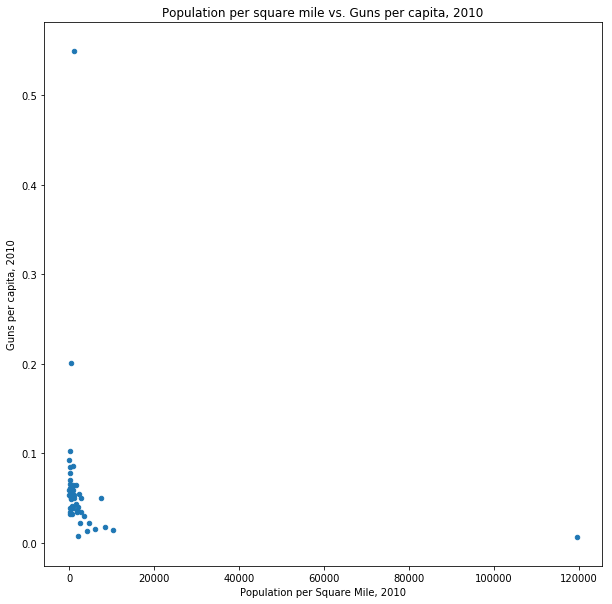

In [61]:
# scatter plot of population per square mile (2010) vs 2010 gun checks issued
census_df.plot(x='Population per square mile, 2010',y='2010_guns_per_cap', kind='scatter', figsize=[10,10])
plt.xlabel('Population per Square Mile, 2010')
plt.ylabel('Guns per capita, 2010')
plt.title('Population per square mile vs. Guns per capita, 2010');

Other than a few outliers, it appears that there is a weak correlation between population per square mile and total gun permits issued. This would make sense as people who live in more sparsely populated areas often need guns for hunting, protecting livestock, and personal safety (in absence of a robust law enforcement presence).

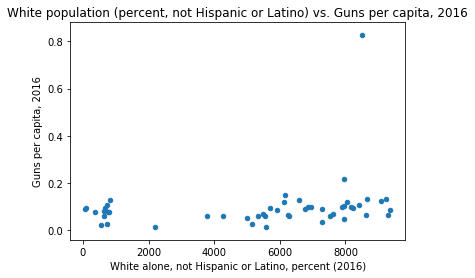

In [62]:
# plot White population vs guns per capita
census_df.plot(x='White alone, not Hispanic or Latino, percent, July 1, 2016,  (V2016)', y='2016_guns_per_cap', kind='scatter')
plt.xlabel('White alone, not Hispanic or Latino, percent (2016)')
plt.ylabel('Guns per capita, 2016')
plt.title('White population (percent, not Hispanic or Latino) vs. Guns per capita, 2016');

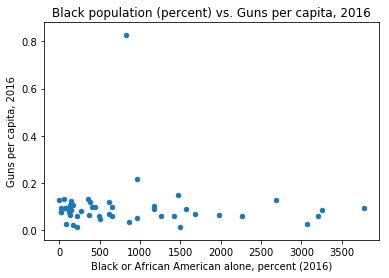

In [63]:
# plot Black population vs guns per capita
census_df.plot(x='Black or African American alone, percent, July 1, 2016,  (V2016)', y='2016_guns_per_cap', kind='scatter')
plt.xlabel('Black or African American alone, percent (2016)')
plt.ylabel('Guns per capita, 2016')
plt.title('Black population (percent) vs. Guns per capita, 2016');

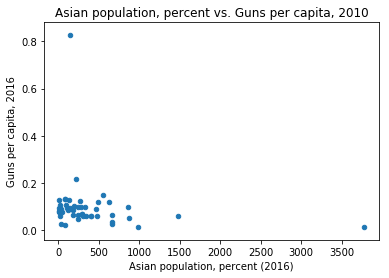

In [64]:
# plot Asian population vs guns per capita
census_df.plot(x='Asian alone, percent, July 1, 2016,  (V2016)', y='2016_guns_per_cap', kind='scatter')
plt.xlabel('Asian population, percent (2016)')
plt.ylabel('Guns per capita, 2016')
plt.title('Asian population, percent vs. Guns per capita, 2010');

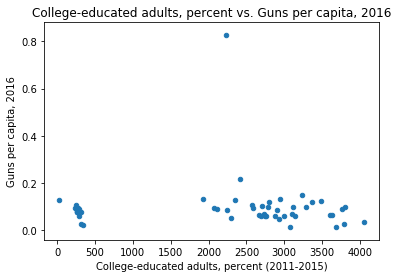

In [65]:
# plot college degree holders vs guns per capita
census_df.plot(x='Bachelor\'s degree or higher, percent of persons age 25 years+, 2011-2015', y='2016_guns_per_cap', kind='scatter')
plt.xlabel('College-educated adults, percent (2011-2015)')
plt.ylabel('Guns per capita, 2016')
plt.title('College-educated adults, percent vs. Guns per capita, 2016');

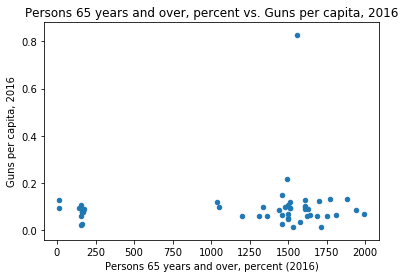

In [66]:
# plot seniors vs guns per capita
census_df.plot(x='Persons 65 years and over, percent,  July 1, 2016,  (V2016)', y='2016_guns_per_cap', kind='scatter')
plt.xlabel('Persons 65 years and over, percent (2016)')
plt.ylabel('Guns per capita, 2016')
plt.title('Persons 65 years and over, percent vs. Guns per capita, 2016');

<a id='conclusions'></a>
## Conclusions

The notes from the GitHub page about the data (https://github.com/BuzzFeedNews/nics-firearm-background-checks/blob/master/README.md) offer the following caveats:

- An increase in background check requests may signify an increase in gun purchases, but it's not a direct correlation. The laws in each state vary in terms of when checks are required to be submitted and resubmitted and how often. Therefore, while an increase in background checks may indicate more gun purchases in total, it also may indicate stricter regulations (for example, Kentucky runs a check every month for each concealed carry permit holder).

### Conclusions from this report

- Between 2016 and 2010, Kentucky had a 54% increase in background checks for guns. The caveat above would certainly seem to support why Kentucky's permit totals are twice as high as the next state.

- There appears to be some correlation between population per square mile and guns per capita. The fewer people per square mile the more guns. Intuitively this makes sense as those who live in sparsely populated areas are more likely to need guns to hunt, protect livestock, and possible for personal safety in absense of a more robust law enforcement presence.

- There does not appear to be any strong correlation between race, education, or age, and guns checks per capita.

- I don't believe the FBI data is sufficient enough to show much of a correlation with the Census data. While the Census data is more complete, the FBI data has a few issues. First, the data for each state wasn't complete. Only the year-month, state, and grand totals were complete. All the other facts were missing values. Furtermore, the FBI data doesn't take into account the effect of different laws in each state. This report didn't attempt to develop a model to mitigate the distorting effects of different laws on each state's gun background check numbers. To do a fair comparison from state to state, one would need to account for the effects of laws in each state requiring background checks.

- Also, I did not attempt any true statistical work - only intuitive correlations based on visual inspection. This was a very simple exploration. Further investigation would be required to find stronger correlations using more rigorous statistical analysis.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [67]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0